In [1]:
# Step-by-step resolution for the `google.protobuf` error in one cell
try:
    # Upgrade protobuf
    !pip install --upgrade protobuf
    
    # Check TensorFlow version
    import tensorflow as tf
    print(f"TensorFlow version: {tf.__version__}")
    
    # Adjust protobuf version if needed (example: change <compatible_version> based on TensorFlow version)
    tf_version = tf.__version__
    if tf_version.startswith("2.13"):
        !pip install protobuf<4.0.0
    elif tf_version.startswith("2.14") or tf_version.startswith("2.15"):
        !pip install protobuf>=4.0.0
    
    # Verify protobuf installation
    from google.protobuf import message
    print("Protobuf installed and working successfully!")
    
except ModuleNotFoundError as e:
    print(f"Error: {e}. Trying to reinstall TensorFlow and Keras...")
    
    # Clear cache
    !pip cache purge
    
    # Reinstall TensorFlow and Keras
    !pip uninstall tensorflow keras -y
    !pip install tensorflow keras
    
    # Verify protobuf again
    try:
        from google.protobuf import message
        print("Protobuf installed and working successfully after reinstallation!")
    except ModuleNotFoundError as e:
        print(f"Error persists: {e}.")


TensorFlow version: 2.18.0
Protobuf installed and working successfully!


In [2]:
# 1. Uninstall any corrupted or existing protobuf installation
!pip uninstall protobuf -y

# 2. Clear pip cache to avoid using cached corrupted files
!pip cache purge

# 3. Reinstall protobuf
!pip install protobuf

!pip install --upgrade keras tensorflow


# 4. Verify installation
try:
    from google.protobuf import message
    print("Protobuf installed and working successfully!")
except ModuleNotFoundError as e:
    print(f"Error: {e}")


Found existing installation: protobuf 5.28.3
Uninstalling protobuf-5.28.3:
  Successfully uninstalled protobuf-5.28.3


You can safely remove it manually.


Files removed: 1005
Protobuf installed and working successfully!


Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


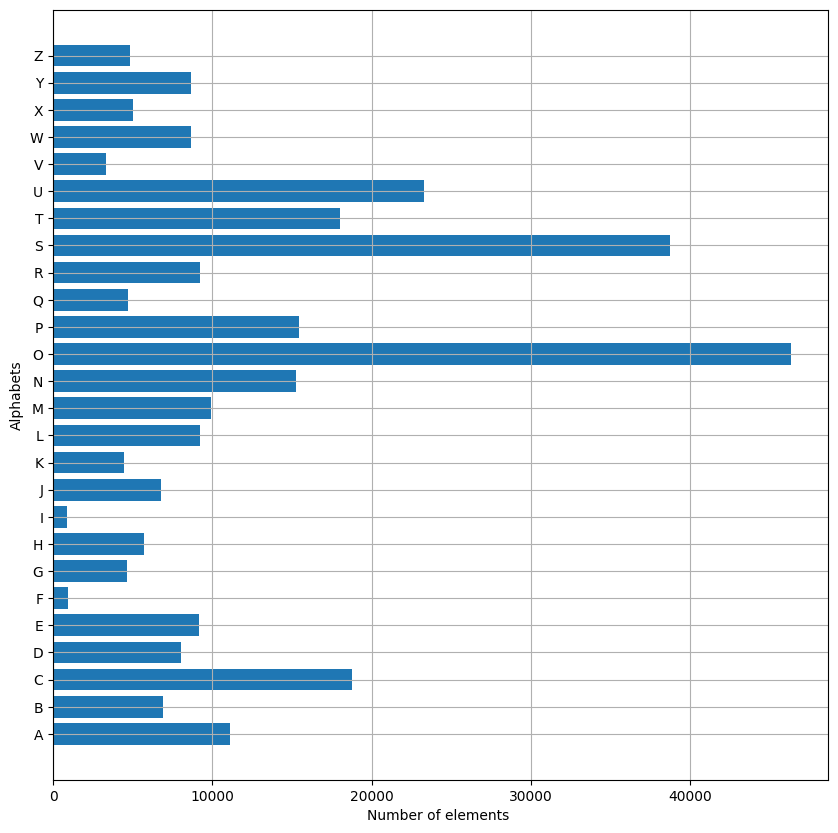

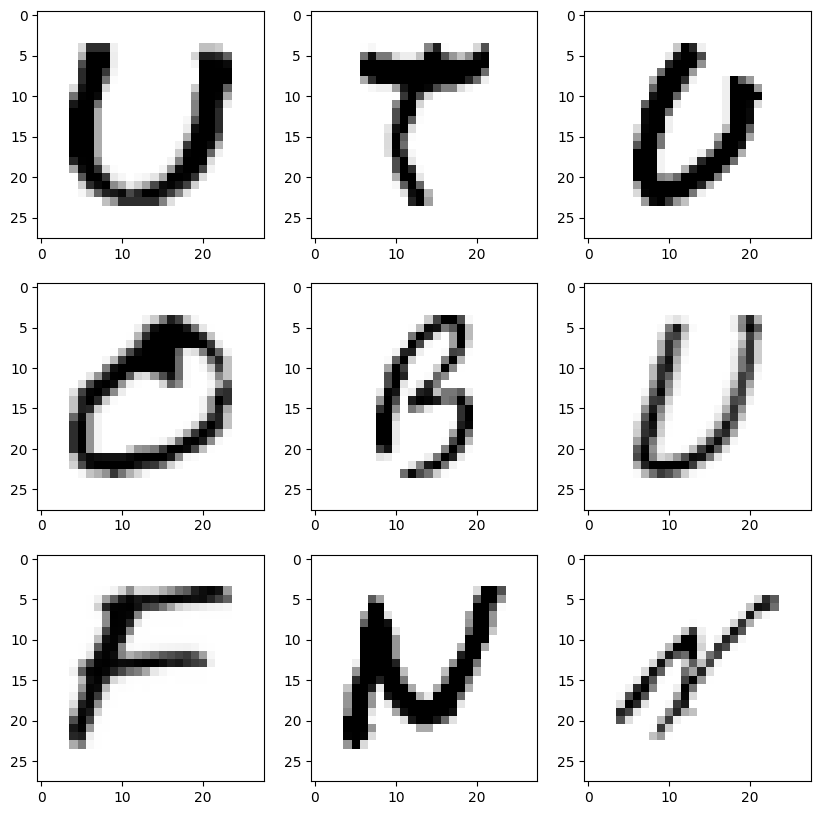

New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)
New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


c:\Users\prane\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9312/9312 ━━━━━━━━━━━━━━━━━━━━ 176s 18ms/step - accuracy: 0.9138 - loss: 0.3670 - val_accuracy: 0.9738 - val_loss: 0.0939


The validation accuracy is: [0.9738354086875916]
The training accuracy is: [0.9571821689605713]
The validation loss is: [0.09390003234148026]
The training loss is: [0.15772704780101776]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


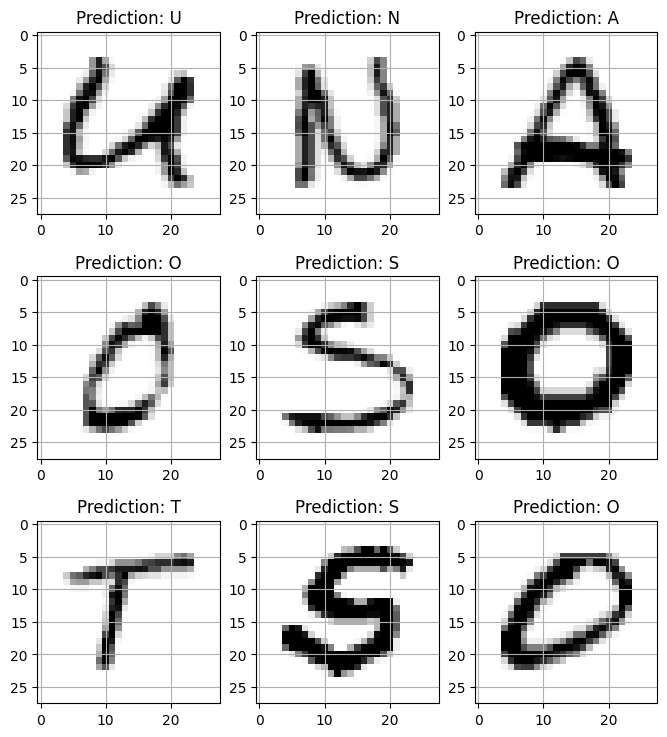

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


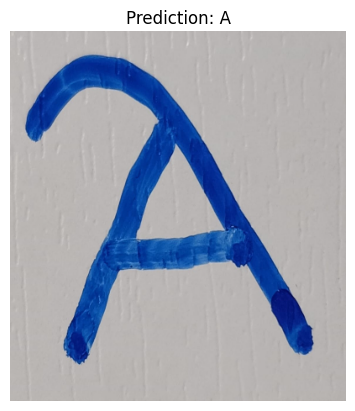

In [11]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tqdm.notebook import tqdm  # Use tqdm.notebook in Jupyter Notebooks
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential  # Ensure Sequential is imported here
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical  # Updated import
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm  # Use tqdm.notebook in Jupyter Notebooks
from sklearn.utils import shuffle
import os


data = pd.read_csv(r"C:\Users\prane\Downloads\IDP\A_Z Handwritten Data.csv").astype('float32')


X = data.drop('0', axis=1)
y = data['0']


train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

# Dictionary for getting characters from index values...
word_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
             10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
             19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

train_yint = train_y.astype(int)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] += 1

alphabets = [word_dict[i] for i in range(26)]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap="Greys")
plt.show()

train_X = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)
print("New shape of test data: ", test_X.shape)

train_yOHE = to_categorical(train_y, num_classes=26)  # Removed dtype='int'
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes=26)  # Removed dtype='int'
print("New shape of test labels: ", test_yOHE.shape)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))

model.add(Dense(26, activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_yOHE, epochs=1, validation_data=(test_X, test_yOHE))

# Save model
model.save(r'model_hand.h5')

# Displaying the accuracies & losses for train & validation set...
print("The validation accuracy is:", history.history['val_accuracy'])
print("The training accuracy is:", history.history['accuracy'])
print("The validation loss is:", history.history['val_loss'])
print("The training loss is:", history.history['loss'])

# Making model predictions...
pred = model.predict(test_X[:9])

# Displaying some of the test images & their predicted labels...
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(test_X[i], (28, 28))
    ax.imshow(img, cmap="Greys")
    pred_label = word_dict[np.argmax(pred[i])]
    ax.set_title(f"Prediction: {pred_label}")
    ax.grid()

plt.show()

# Image prediction for external image...
img_path = r"C:\Users\prane\Downloads\A image.jpg"
# Read the image using OpenCV
img = cv2.imread(img_path)

if img is None:
    print("Error: Unable to load image.")
else:
    # Convert the image to RGB (OpenCV loads it in BGR by default)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (400, 440))  # Resize the image

    # Preprocess the image for prediction
    img_copy = img.copy()
    img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
    img_final = cv2.resize(img_thresh, (28, 28))
    img_final = np.reshape(img_final, (1, 28, 28, 1))

    # Make prediction
    img_pred = word_dict[np.argmax(model.predict(img_final))]

    # Display the image and prediction using Matplotlib
    plt.imshow(img)
    plt.title(f"Prediction: {img_pred}")
    plt.axis('off')  # Hide axes for better image display
    plt.show()

    #
